# Ensemble

#### Ensemble
- 약한 모델이 올바르게 결합하면 더 정확하고 견고한 모델을 얻을 수 있음
<br>-> 여러 개의 모델을 결합하여 훨씬 강력한 모델을 생성하는 기법</br>

#### 1. Voting
- 여러 모델들의 예측 결과를 투표를 통해 최종 예측 결과를 결정
- 하드 보팅 : 다수 모델이 예측한 값이 최종 결과
- 소프트 보팅 : 모든 모델이 예측한 레이블 값의 결정 확률 평균을 구한 뒤 가장 확률이 높은 값 최정 선택

<div style="text-align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Voting1.png?raw=true">
</div>

#### 2. Bagging
- Bootstrap Aggregating 약자
- 데이터포부터 Bootstramp 한 데이터로 모델들을 학습시킨 후, 모델들의 예측 결과를 집계해 최종 결과 얻음
- 데이터 분할 시 중복 허용
- 범주형 데이터 -> Voting 방식으로 결과 집계
- 연속형 데이터는 평균으로 결과 집계
- 대표 알고리즘 : Random Forest

<div style="text-align:center;">
    <img src="https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Bagging1.png?raw=true">
</div>

#### Random Forest
- 배깅의 가장 대표적인 알고리즘
- 여러 DT 모델이 배깅 방식으로 각자 데이터 샘플링
- 개별적으로 학습 수행 후 모든 결과를 집계해 최종 결과 결정

<div style="text-align:center;">
    <img src = "https://github.com/Ha-coding-user/aivle_study/blob/main/ML/imge/Bagging2.png?raw=true">
</div>

**주요 hyperparameter**
- n_estimators
    - 만들어질 Decision Tree 개수 지정(Default : 100)
    - 많이 지정한다고 성능 좋아지는 것은 아님
    - 너무 늘리면 속도 느려짐
- max_depth
    - 트리 최대 깊이
- min_samples_split
    - 노드를 분할하기 위한 최소 샘플 개수(default : 2)
    - 작게 설정할 수록 트리 깊이 깊어져 overfitting
- min_samples_leaf
    - 리프 노드가 되기 위한 최소한의 샘플 수(default : 1)
    - overfitting 방지를 목적으로
- max_feature
    - 최선의 분할을 위해 고려할 Feature 수(default : auto)
    - default -> 모든 Feature를 사용해 분할
    - 정수형 -> Feature 수
    - 실수형 -> Feature 비율
    - 'sqrt' -> 전체 Feature 수의 루트 값
    - 'auto' -> 'sqrt와 동일
    - 'log' -> log2(전체 Feature 수)

#### 3. Boosting
- 같은 유형의 알고리즘 기반 모델 여러 개에 대해 순차적으로 학습 수행
- 이전 모델이 제대로 예측하지 못한 데이터에 대해 가중치 부여해 다음 모델이 학습, 예측 진행
- 속도가 느리고 overfitting 발생 가능성 있음
- 대표 알고리즘 : XGBoost, LightGBM

#### XGBoost
- GBM 알고리즘을 병렬 학습이 가능하도록 구현한 것
- 회귀, 분류 문제 모두 지원하며, 성능 자원 효율이 좋아 많이 사용
- 장점
    - 높은 예측 성능
    - 빠른 수행 시간(GBM 대비)
    - 규제
    - 가지치기
    - 내장된 교차 검증
    - 결측치 자체 처리

**주요 hyperparameter**
- learning_rate
    - 0 ~ 1 사이 값
    - 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값(default = 0.1)
- n_estimators
    - weak learner 개수로, 개수가 많을 수록 일정 수준까지는 성능 좋아질 수 있음(default : 100)
    - 너무 많으면 시간 많이 소요
- max_depth
    - 트리 기반 알고리즘 max_depth와 같은 의미

#### 실습

- 다양한 알고리즘으로 모델 만들고 성능 비교

**1. 환경 준비**

In [1]:
# Library 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# data 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

**2. 데이터 이해**

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기초통계량 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


**3. 데이터 준비**

*1) x, y 분리*

In [5]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

*2) train, test 분리*

In [6]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

*3) 정규화*

In [7]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

**4. 모델링**

In [8]:
# xgboost 설치
# !pip install xgboost

In [9]:
# lightgbm 설치
# !pip install lightgbm

In [36]:
# Library 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

*1) KNN*

In [38]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [39]:
# 학습하기
model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [40]:
# 예측하기
y_pred = model.predict(x_test)

In [41]:
# 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[ 0 84]
 [ 0 66]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.44      1.00      0.61        66

    accuracy                           0.44       150
   macro avg       0.22      0.50      0.31       150
weighted avg       0.19      0.44      0.27       150



In [42]:
# 정확도 기록
result = {}
result['KNN'] = accuracy_score(y_test, y_pred)

*2) Decision Tree*

In [43]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [44]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [45]:
# 예측하기
y_pred = model.predict(x_test)

In [46]:
# 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[77  7]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.88      0.80      0.84        66

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



In [47]:
# 기록하기
result['Decision Tree'] = accuracy_score(y_test, y_pred)

*3) Logistic Regression*

In [48]:
# 선언하기
model = LogisticRegression()

In [49]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [50]:
# 예측하기
y_pred = model.predict(x_test)

In [51]:
# 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[75  9]
 [14 52]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.85      0.79      0.82        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



In [52]:
result['Logistic Regression'] = accuracy_score(y_test, y_pred)

*4) Random Forest*

In [53]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

In [54]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [55]:
# 예측하기
y_pred = model.predict(x_test)

In [56]:
# 평가하기
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix:
 [[78  6]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        84
           1       0.90      0.80      0.85        66

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



In [57]:
result['Random Forest'] = accuracy_score(y_test, y_pred)

*5) XGBoost*

In [58]:
# 선언하기
model = XGBClassifier(max_depth=5, random_state=1)

In [59]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [60]:
# 예측하기
y_pred = model.predict(x_test)

In [61]:
# 평가하기
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion_matrix:
 [[78  6]
 [16 50]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        84
           1       0.89      0.76      0.82        66

    accuracy                           0.85       150
   macro avg       0.86      0.84      0.85       150
weighted avg       0.86      0.85      0.85       150



In [62]:
result['XGboost'] = accuracy_score(y_test, y_pred)

*6) LightGBM*

In [63]:
# 선언하기
model = LGBMClassifier(max_depth=5, random_state=1)

In [64]:
# 학습하기
model.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 152, number of negative: 198
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 350, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.434286 -> initscore=-0.264387
[LightGBM] [Info] Start training from score -0.264387
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

LGBMClassifier(max_depth=5, random_state=1)

In [65]:
# 예측하기
y_pred = model.predict(x_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [66]:
# 평가하기
print('confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

confusion matrix:
 [[77  7]
 [14 52]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.88      0.79      0.83        66

    accuracy                           0.86       150
   macro avg       0.86      0.85      0.86       150
weighted avg       0.86      0.86      0.86       150



In [70]:
result['LightGBM'] = accuracy_score(y_test, y_pred)

In [71]:
result

{'KNN': 0.44,
 'Decision Tree': 0.8666666666666667,
 'Logistic Regression': 0.8466666666666667,
 'Random Forest': 0.8733333333333333,
 'XGboost': 0.8533333333333334,
 'LightGBM': 0.86}

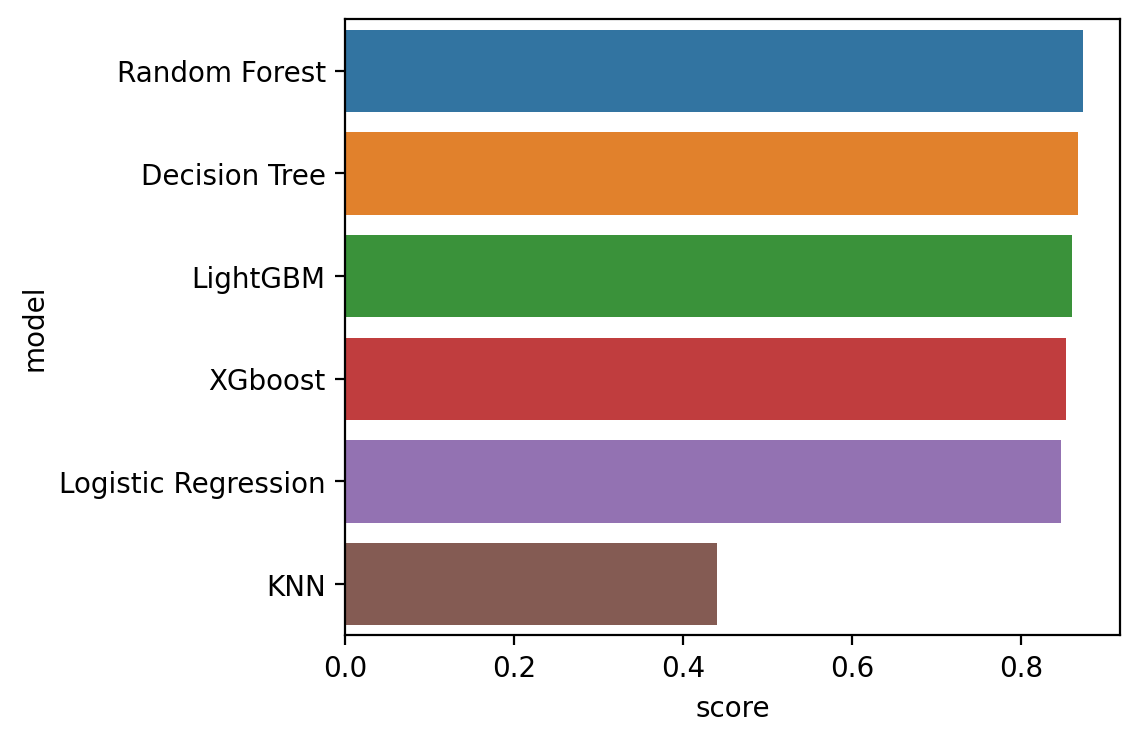

In [74]:
perf_dic = {'model': result.keys(), 'score': result.values()}
df = pd.DataFrame(perf_dic)
df.sort_values(by='score', ascending=False, inplace=True)

# 시각화
plt.figure(figsize=(5, 4))
sns.barplot(x=df['score'], y=df['model'])
plt.show()